In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
df = pd.read_csv('data/csv/newParanaque_saved_coordinates.csv')
df

,X,Y
0,120.984143,14.533076
1,120.983244,14.520337
2,121.001600,14.451343
3,121.001111,14.445416
4,121.000857,14.443456
...,...,...
567,121.000234,14.476116
568,121.000889,14.522531
569,121.000995,14.520438
570,121.000956,14.518549


In [3]:
geometry = gpd.points_from_xy(df['X'], df['Y'], crs="EPSG:4326")
street_points = gpd.GeoDataFrame(geometry=geometry)  
len(street_points)

572

<AxesSubplot:>

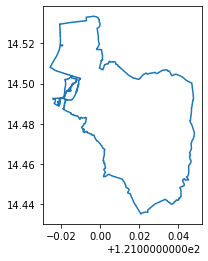

In [4]:
philippines = gpd.read_file('maps/phl_admbnda_adm3_psa_namria_20231106.zip')

paranaque = philippines[philippines['ADM3_EN'] == 'City of Parañaque']
paranaque.boundary.plot()

<AxesSubplot:>

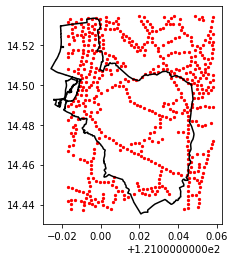

In [14]:
base = paranaque.boundary.plot(edgecolor='black')
street_points.plot(ax=base, markersize=5, color='red')

In [6]:
clipped = gpd.clip(street_points, paranaque)
len(clipped)

243

In [7]:
clipped

,geometry
239,POINT (121.03551 14.44519)
228,POINT (121.03436 14.44665)
222,POINT (121.03317 14.44805)
295,POINT (121.04462 14.45474)
274,POINT (121.04171 14.45499)
...,...
32,POINT (121.00479 14.50729)
550,POINT (120.99897 14.50770)
15,POINT (121.00275 14.50796)
531,POINT (120.99729 14.50851)


<AxesSubplot:>

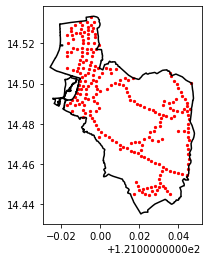

In [18]:
base = paranaque.boundary.plot(edgecolor='black')
clipped.plot(ax=base, markersize=5, color='red')

In [13]:
df = pd.DataFrame({'X': clipped.geometry.x, 'Y': clipped.geometry.y})
df.to_csv('data/csv/paranaque_filtered_coordinates.csv', index=False)